In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
woman=cv2.imread('DATA/Nadia_Murad.jpg',0)
man=cv2.imread('DATA/Denis_Mukwege.jpg',0)
grp=cv2.imread('DATA/solvay_conference.jpg',0)

# Face detection with Cascade file

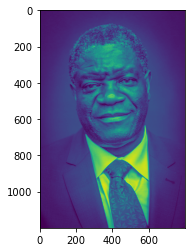

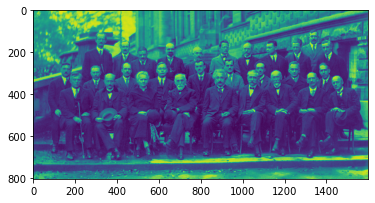

In [11]:
plt.imshow(man)
plt.show()
plt.imshow(grp)

In [36]:
#Create object of 'face detection' cascade file(pre-trained xml file)
face_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [48]:
def detect_face(img):
    face_img=img.copy()
    face_rectangle=face_cascade.detectMultiScale(face_img)
    #print(face_rectangle)
    for (x,y,w,h) in  face_rectangle:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),8)
    return face_img    

[[ 55 141 276 276]]


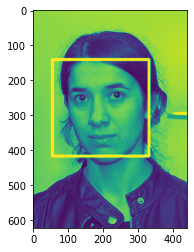

In [15]:
result=detect_face(woman)
plt.imshow(result)

[[ 430  318   34   34]
 [ 912  245   55   55]
 [ 766  248   57   57]
 [ 586  256   63   63]
 [1058  257   56   56]
 [1315  107   51   51]
 [ 300  121   52   52]
 [1300  303   62   62]
 [ 182  312   55   55]
 [ 498  308   61   61]
 [ 668  310   70   70]
 [ 336  317   62   62]
 [ 269  250   61   61]
 [ 131  261   55   55]
 [ 421  259   59   59]
 [1216  258   65   65]
 [1419  324   57   57]
 [1320  375   32   32]
 [1360  266   57   57]
 [ 272  277   57   57]
 [ 766  186   53   53]
 [ 496  194   55   55]
 [ 994  165   53   53]
 [ 673  363   63   63]
 [ 413  155   54   54]
 [1371  157   56   56]
 [1231  160   46   46]
 [ 896  158   51   51]
 [ 629  166   57   57]
 [1101  161   51   51]
 [1130  295   64   64]
 [ 843   58   28   28]
 [1020  301   58   58]
 [ 863  301   60   60]]


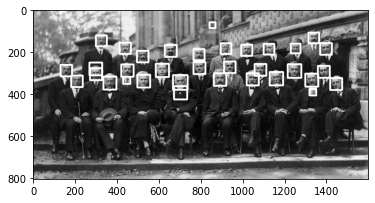

In [16]:
result=detect_face(grp)
plt.imshow(result,'gray')

Since, it dectects multiple rectangle boxes on single face.

We should change some default parameters in 'face_cascade.detectMultiScale(face_img)'

In [34]:
def modyfied_detect_face(img):
    face_img=img.copy()
    face_rectangle=face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    #print(face_rectangle)
    for (x,y,w,h) in  face_rectangle:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),8)
    return face_img    

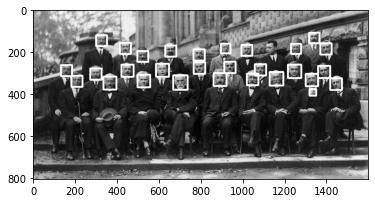

In [35]:
result=modyfied_detect_face(grp)
plt.imshow(result,'gray')

In [37]:
#Create object of 'eye detection' cascade file(pre-trained xml file)
eye_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [41]:
def detect_eyes(img):
    eye_img=img.copy()
    eye_rectangle=eye_cascade.detectMultiScale(eye_img)
    #print(face_rectangle)
    for (x,y,w,h) in  eye_rectangle:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,255,255),8)
    return eye_img

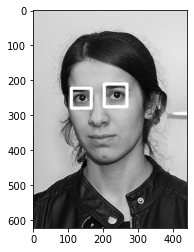

In [44]:
result=detect_eyes(woman)
plt.imshow(result,'gray')

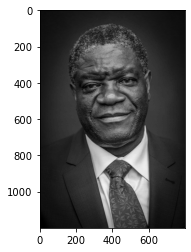

In [45]:
result=detect_eyes(man)
plt.imshow(result,'gray')

##### Here we can't detect eyes of this man .
##### This is becoz his eyes are more black ,as their color intesity is closer to its surrounding.

## Let's do face detection on live camera

In [50]:
cap=cv2.VideoCapture(0)
while 1:
    ret,frame=cap.read(0)
    frame=detect_face(frame)
    
    cv2.imshow('video',frame)
    
    k=cv2.waitKey(1)
    if k==27:
        break
cap.release()        
cv2.destroyAllWindows()        

In [51]:
cap.release()